# Parth Thosani
KMeans, DBScan, Heirarchical Clustering

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [30]:
df = pd.read_csv('StudentsPerformance.csv')

In [31]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [32]:
x= df.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course'],axis=1)

In [33]:
s = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(x)
    s.append(km.inertia_)
s

[673318.602,
 281951.8965908354,
 177450.25542956137,
 136383.659334664,
 111307.99410631621,
 97468.34327680085,
 86250.834524204,
 76552.34385189206,
 68490.71184573678]

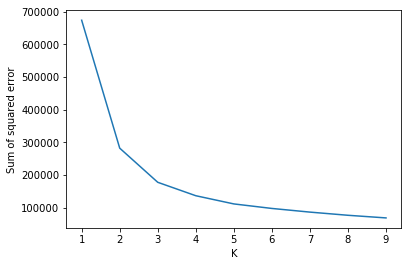

In [34]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,s)

In [35]:
km=KMeans(n_clusters=4)
km.fit(x)
km.labels_

array([3, 1, 1, 2, 3, 3, 1, 2, 0, 2, 0, 2, 3, 3, 0, 3, 1, 2, 2, 0, 0, 3,
       2, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 2, 1, 1, 3, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 0, 2, 3, 2, 0, 3, 0, 0,
       2, 3, 0, 0, 0, 0, 2, 0, 2, 2, 2, 3, 3, 0, 2, 2, 2, 0, 2, 3, 1, 3,
       0, 1, 3, 2, 3, 2, 1, 1, 0, 3, 0, 0, 3, 3, 1, 2, 1, 0, 1, 0, 0, 3,
       1, 0, 2, 0, 1, 3, 1, 3, 0, 0, 1, 1, 1, 0, 3, 1, 3, 3, 3, 2, 1, 2,
       3, 3, 3, 0, 2, 0, 0, 0, 3, 0, 2, 2, 3, 2, 1, 3, 3, 1, 0, 3, 0, 2,
       0, 1, 3, 0, 3, 0, 3, 1, 2, 2, 1, 1, 2, 3, 3, 3, 3, 1, 1, 0, 2, 1,
       2, 3, 0, 1, 3, 0, 2, 3, 2, 0, 3, 0, 2, 1, 0, 3, 0, 0, 3, 0, 0, 0,
       2, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 0, 3, 2, 0, 0, 1, 1, 1, 2, 3, 0,
       0, 1, 0, 1, 0, 2, 3, 0, 3, 1, 3, 2, 3, 1, 1, 3, 0, 0, 2, 1, 3, 1,
       0, 2, 3, 3, 3, 0, 0, 0, 2, 3, 0, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 1,
       3, 2, 3, 3, 1, 3, 0, 2, 2, 3, 1, 3, 1, 0, 3, 0, 2, 2, 3, 3, 2, 1,
       1, 3, 3, 3, 3, 3, 0, 3, 3, 0, 2, 3, 2, 1, 3,

Text(0.5,1,'kmeans')

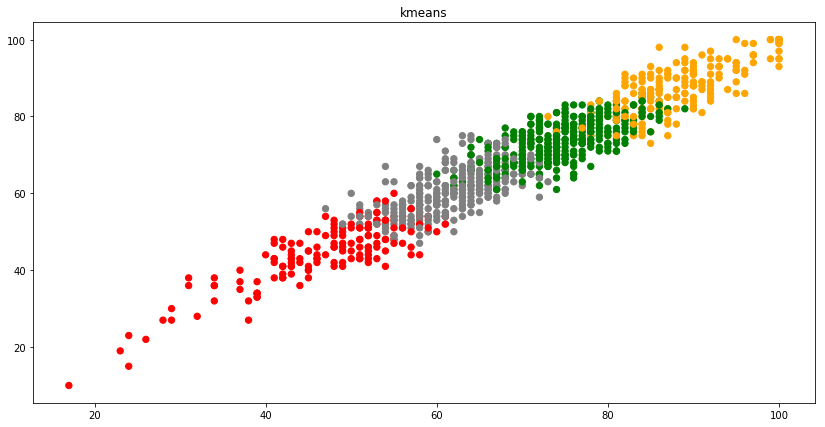

In [36]:
colormap=np.array(['gray','orange','red','green'])
plt.figure(figsize=(14,7))
plt.scatter(x['reading score'],x['writing score'],c=colormap[km.labels_],s=40)
plt.title("kmeans")

In [37]:
import scipy.cluster.hierarchy as sch
x= df.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course'],axis=1)

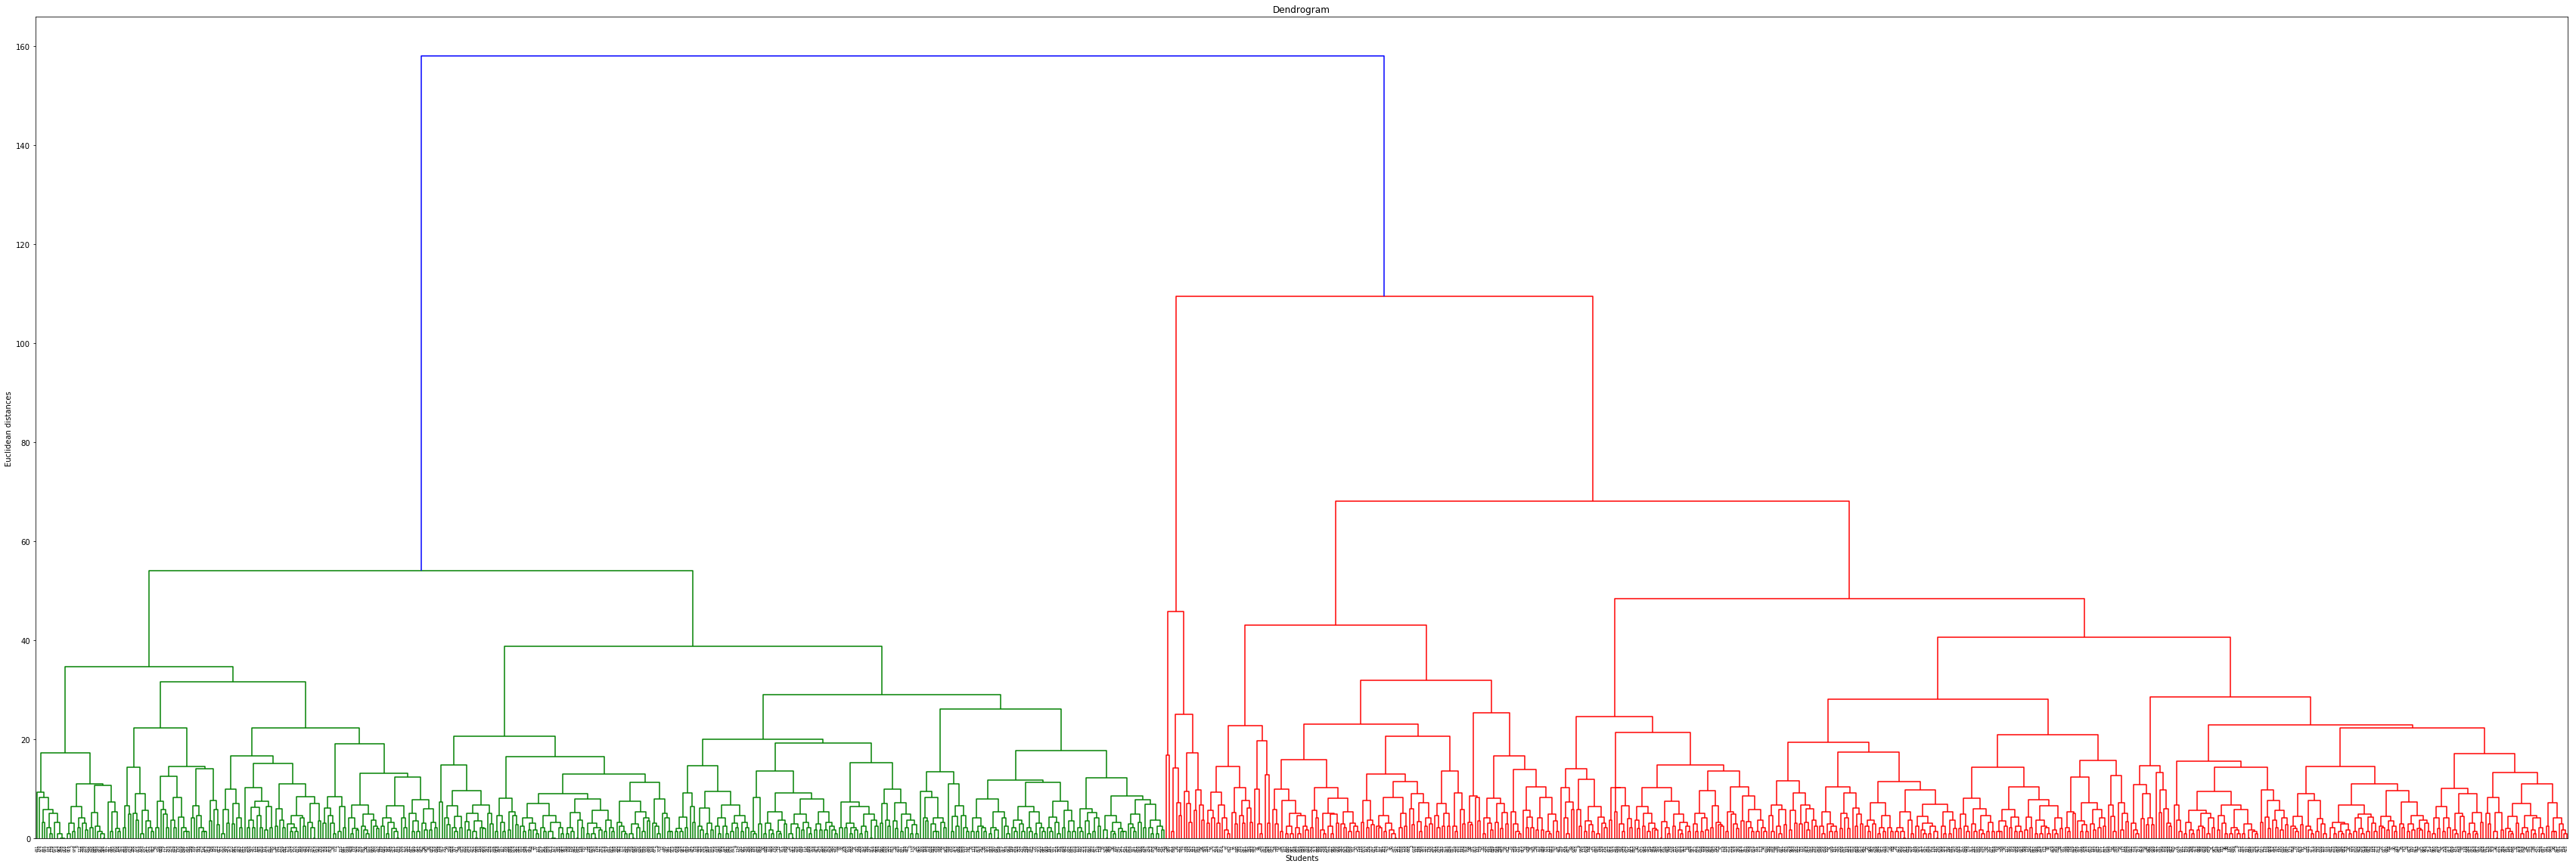

In [38]:
plt.figure(figsize=(60,20))
dendrogram = sch.dendrogram(sch.linkage(x, method  = "complete"))
plt.title('Dendrogram')
plt.xlabel('Students')
plt.ylabel('Euclidean distances')
plt.show()

In [39]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [40]:
x= df.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course'],axis=1)

In [41]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

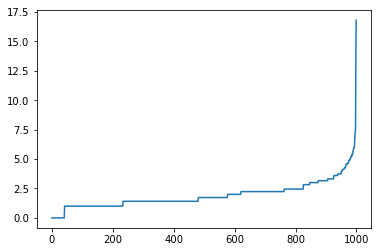

In [42]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [43]:
m = DBSCAN(eps=5, min_samples=5)
m.fit(x)

DBSCAN(algorithm='auto', eps=5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [44]:
clusters = m.labels_

In [45]:
clusters

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

Text(0.5,1,'DBSCAN')

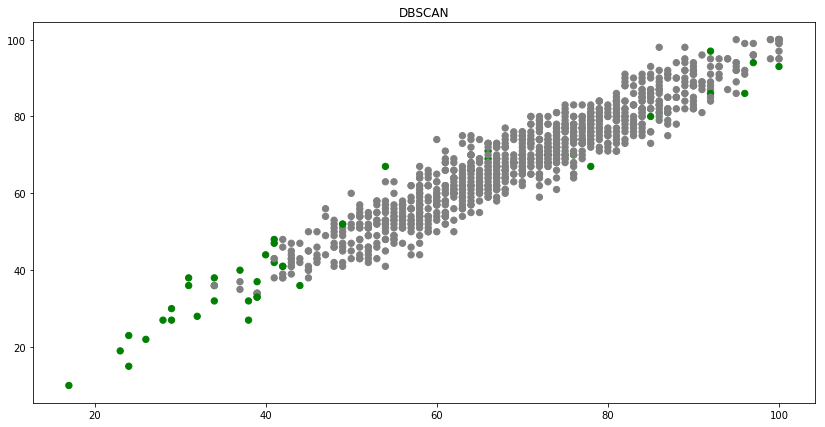

In [46]:
colormap=np.array(['gray','orange','red','green'])
plt.figure(figsize=(14,7))
plt.scatter(x['reading score'],x['writing score'],c=colormap[m.labels_],s=40)
plt.title("DBSCAN")

In [47]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='complete')

In [48]:
y_hc=hc.fit_predict(x)

In [49]:
y_hc

array([0, 0, 0, 3, 0, 0, 0, 3, 1, 1, 3, 3, 0, 0, 3, 0, 0, 2, 3, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 3, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 3, 1, 3, 0, 0, 3, 0, 3, 1, 2, 0, 3, 1, 0, 1, 1,
       3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 2, 0, 1, 1, 3, 3, 3, 1, 3, 0, 0, 0,
       1, 0, 1, 2, 0, 3, 0, 0, 1, 1, 1, 1, 1, 0, 0, 3, 0, 1, 0, 1, 1, 1,
       0, 1, 3, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 3, 0, 3,
       0, 0, 0, 3, 3, 1, 1, 1, 0, 1, 1, 3, 0, 2, 0, 1, 0, 0, 1, 1, 1, 3,
       1, 0, 0, 1, 0, 1, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 3, 1, 3, 1, 0, 1, 3, 0, 1, 0, 1, 1, 0, 1, 1, 3,
       1, 0, 0, 0, 0, 1, 3, 0, 1, 0, 0, 1, 0, 2, 1, 3, 0, 0, 0, 3, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 3, 1, 0, 1, 3, 0, 0, 0, 0, 1, 1, 3, 0, 1, 0,
       3, 3, 0, 0, 0, 1, 1, 1, 3, 0, 1, 0, 3, 1, 1, 0, 0, 0, 0, 0, 3, 0,
       0, 3, 0, 0, 0, 0, 1, 3, 1, 1, 0, 0, 0, 1, 0, 1, 3, 3, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 3, 0, 3, 0, 0,

Text(0.5,1,'heirarchical clustering')

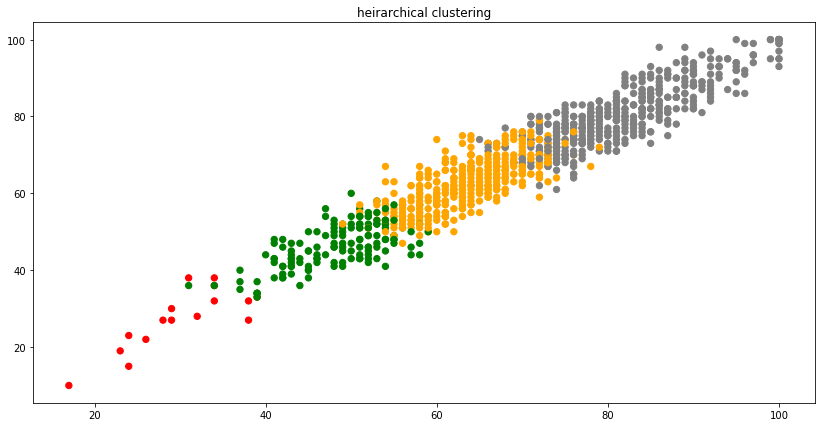

In [50]:
colormap=np.array(['gray','orange','red','green'])
plt.figure(figsize=(14,7))
plt.scatter(x['reading score'],x['writing score'],c=colormap[hc.labels_],s=40)
plt.title("heirarchical clustering")